In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Corrected import statement
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [25]:
#Read data
teams = pd.read_csv("/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv")
data = teams[['W', 'SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']] 

In [27]:
# Descriptive Statistics 
print(teams.describe()) 

            yearID         Rank           G        Ghome            W  \
count  2805.000000  2805.000000  2805.00000  2406.000000  2805.000000   
mean   1955.036720     4.107308   150.34795    78.465919    74.749020   
std      41.519083     2.323414    23.22725     4.698684    17.640402   
min    1871.000000     1.000000     6.00000    44.000000     0.000000   
25%    1919.000000     2.000000   153.00000    77.000000    66.000000   
50%    1963.000000     4.000000   157.00000    81.000000    77.000000   
75%    1992.000000     6.000000   162.00000    81.000000    87.000000   
max    2015.000000    13.000000   165.00000    84.000000   116.000000   

                 L            R           AB            H           2B  ...  \
count  2805.000000  2805.000000  2805.000000  2805.000000  2805.000000  ...   
mean     74.749020   681.945811  5142.492335  1346.273440   227.624955  ...   
std      17.378079   135.738244   750.551691   219.891603    58.692602  ...   
min       4.000000    24.0

Missing values before handling:
 SO     120
BB       0
SB     144
HA       0
HRA      0
ERA      0
W        0
dtype: int64

Missing values after handling:
 SO     0
BB     0
SB     0
HA     0
HRA    0
ERA    0
dtype: int64

Model Results:
R-squared Score: 0.5555375946203206
Root Mean Square Error: 9.284651664752843

Feature Coefficients:
SO: -0.0096
BB: 0.0656
SB: 0.0229
HA: 0.0174
HRA: 0.1281
ERA: -16.3741


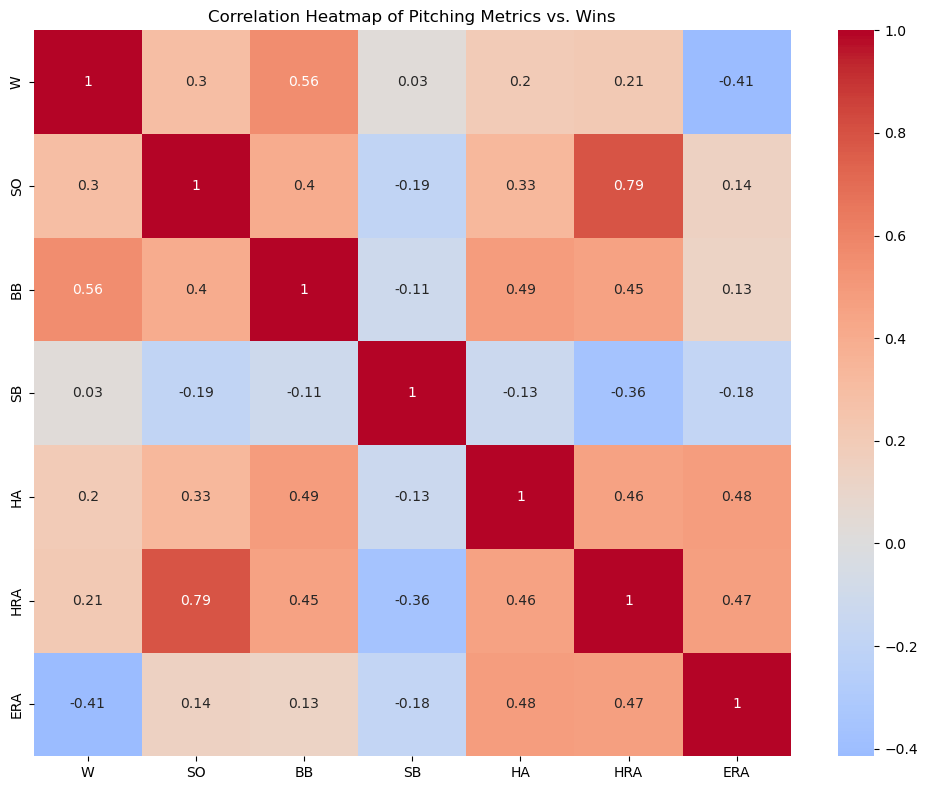

In [6]:
#Calculate liner regression 
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')

# Check for missing values before handling them
print("Missing values before handling:\n", df[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA', 'W']].isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna(subset=['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA', 'W'])

# Select features and target
X = df_cleaned[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df_cleaned['W']

# Check for missing values after handling them
print("\nMissing values after handling:\n", X.isnull().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("\nModel Results:")
print("R-squared Score:", r2)
print("Root Mean Square Error:", rmse)
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['W', 'SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']].corr(), 
            annot=True, 
            cmap='coolwarm',
            center=0)
plt.title('Correlation Heatmap of Pitching Metrics vs. Wins')
plt.tight_layout()
plt.show()

In [ ]:
#Utilized ChatGPT to fix several logical errors specifically for checking for missing data.
# and splitting the data for the regression model.  
#OpenAI, personal communication, February 20, 2025

In [8]:
#Multiple Linear Regression (MLR)
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')

# Handle missing values
df_cleaned = df.dropna(subset=['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA', 'W'])

# Select features and target
X = df_cleaned[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df_cleaned['W']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print model performance metrics
print("Model Performance Metrics:")
print("-" * 30)
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Print coefficients and intercept
print("\nModel Parameters:")
print("-" * 30)
print(f"Intercept: {model.intercept_:.4f}")
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Create visualizations
plt.figure(figsize=(12, 5))

#Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')

# Plot 2: Residuals Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Wins')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')

plt.tight_layout()


# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Absolute Coefficient': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()


# Print summary statistics
print("\nSummary Statistics:")
print("-" * 30)
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")
print("\nFeature Summary:")
print(X.describe())

Model Performance Metrics:
------------------------------
R-squared Score: 0.5555
Root Mean Square Error: 9.2847
Mean Absolute Error: 7.4773

Model Parameters:
------------------------------
Intercept: 74.7958

Feature Coefficients:
SO: -0.0096
BB: 0.0656
SB: 0.0229
HA: 0.0174
HRA: 0.1281
ERA: -16.3741

Summary Statistics:
------------------------------
Number of training samples: 2032
Number of testing samples: 509

Feature Summary:
                SO          BB           SB           HA          HRA  \
count  2541.000000  2541.00000  2541.000000  2541.000000  2541.000000   
mean    764.827627   497.72806   108.596222  1383.215270   110.071625   
std     280.911387   103.23186    69.614574   171.202237    53.724534   
min       0.000000     0.00000     0.000000   144.000000     0.000000   
25%     532.000000   443.00000    63.000000  1320.000000    68.000000   
50%     795.000000   503.00000    92.000000  1403.000000   117.000000   
75%     978.000000   561.00000   136.000000  1479.0

In [ ]:
#Utilized ChatGPT to fix several syntax error and logical errors for MLR.
 #OpenAI, personal communication, February 20, 2025

In [10]:
#Ridge Regression Model
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')

# Handle missing values
df_cleaned = df.dropna(subset=['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA', 'W'])

# Select features and target
X = df_cleaned[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df_cleaned['W']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best alpha using GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Get the best alpha
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Create and fit the model with best alpha
model = Ridge(alpha=best_alpha)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print model performance metrics
print("\nModel Performance Metrics:")
print("-" * 30)
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Print coefficients and intercept
print("\nModel Parameters:")
print("-" * 30)
print(f"Intercept: {model.intercept_:.4f}")
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Create visualizations
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual vs Predicted Wins')

# Plot 2: Residuals Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Wins')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')

plt.tight_layout()

# Save the plots
plt.savefig('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Ridge_plots.png')
plt.close()

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Absolute Coefficient': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Ridge Regression)')
plt.tight_layout()

# Save the feature importance plot
plt.savefig('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Ridge_Feature_importance.png')
plt.close()

# Compare coefficients with regular linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("\nCoefficient Comparison:")
print("-" * 30)
print("Feature      Ridge    Linear")
print("-" * 30)
for feature, ridge_coef, lr_coef in zip(X.columns, model.coef_, lr.coef_):
    print(f"{feature:10} {ridge_coef:8.4f} {lr_coef:8.4f}")

Best alpha value: 10

Model Performance Metrics:
------------------------------
R-squared Score: 0.5547
Root Mean Square Error: 9.2934
Mean Absolute Error: 7.4771

Model Parameters:
------------------------------
Intercept: 76.4833

Feature Coefficients:
SO: -2.4793
BB: 6.9158
SB: 1.5781
HA: 3.0220
HRA: 6.6201
ERA: -11.1409

Coefficient Comparison:
------------------------------
Feature      Ridge    Linear
------------------------------
SO          -2.4793  -2.6960
BB           6.9158   6.9128
SB           1.5781   1.6179
HA           3.0220   3.0640
HRA          6.6201   6.8984
ERA        -11.1409 -11.3047


In [ ]:
#Utilized ChatGPT to walk through steps of Ridge Regression Model which helped with correct coding.
#OpenAI, personal communication, February 20, 2025

In [12]:
#Model Performance Sub Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Read and prepare the data
df = pd.read_csv('/Users/becky/OneDrive/Documents/Classes/AAI500/Final/Data/Teams.csv')
df_cleaned = df.dropna(subset=['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA', 'W'])

# Select features and target
X = df_cleaned[['SO', 'BB', 'SB', 'HA', 'HRA', 'ERA']]
y = df_cleaned['W']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using statsmodels for p-values
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Fit model using sklearn for predictions
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred = model_sk.predict(X_test)

# Calculate metrics
# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate VIF
vif_data = calculate_vif(X_train)

# Print all results
print("Model Performance Metrics:")
print("-" * 50)
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nVariance Inflation Factors (VIF):")
print("-" * 50)
print(vif_data)

print("\nModel Summary (including p-values):")
print("-" * 50)
print(model_sm.summary())




Model Performance Metrics:
--------------------------------------------------
R-squared: 0.5555
Adjusted R-squared: 0.5502
Mean Squared Error (MSE): 86.2048
Root Mean Squared Error (RMSE): 9.2847

Variance Inflation Factors (VIF):
--------------------------------------------------
  Variable        VIF
0       SO  25.939148
1       BB  34.511319
2       SB   3.922599
3       HA  87.604498
4      HRA  20.916760
5      ERA  45.427408

Model Summary (including p-values):
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     627.3
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:23:03   Log-Likelihood:                -7425.7
No

In [ ]:
#Utilized ChatGPT to to fix logical errors in VIF calculations.
#OpenAI, personal communication, February 20, 2025